In [96]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head()

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head()


# Combine the data into a single dataset

merge_data = pd.merge(city_data_df,ride_data_df, on = "city")

# Display the data table for preview

merge_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

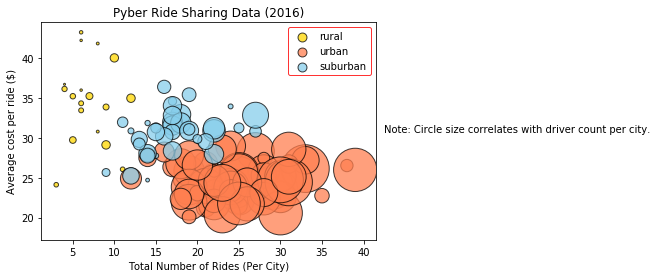

<Figure size 432x288 with 0 Axes>

In [97]:
# Obtain the x and y coordinates for each of the three city types

# creating a groupby statement

city_table = merge_data.groupby("city")

# Couting the total rides

total_rides = city_table["ride_id"].count()

# Calculating the average ride cost

average_ride = city_table ["fare"].mean()

# Category of cities (3)

type_of_city = city_data_df.set_index("city")["type"]
type_of_city

# Drivers by city totals

all_drivers_per_city = city_table["driver_count"].sum()



New_table = pd.DataFrame({"Average Fare": average_ride,
                          "Total Rides" : total_rides,
                         "Total Drivers": all_drivers_per_city,
                         "City Type": type_of_city})

New_table

# Build the scatter plots for each city types

suburban =  New_table.loc[New_table["City Type"] == "Suburban"]
rural =  New_table.loc[New_table["City Type"] == "Rural"]
urban =  New_table.loc[New_table["City Type"] == "Urban"]


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average cost per ride ($)")


# Incorporate the other graph properties

plt.scatter(rural["Total Rides"] ,rural["Average Fare"] , marker="o", facecolors="Gold", edgecolors="Black", label= "rural",
             s=rural["Total Drivers"], alpha=0.75)
plt.scatter(urban["Total Rides"] ,urban["Average Fare"] , marker="o", facecolors="Coral", edgecolors="Black", label= "urban",
             s=urban["Total Drivers"], alpha=0.75)
plt.scatter(suburban["Total Rides"] ,suburban["Average Fare"] , marker="o", facecolors="SkyBlue", edgecolors="Black", label= "suburban",
             s=suburban["Total Drivers"], alpha=0.75)
# Create a legend

lgnd = plt.legend(frameon = True, edgecolor = 'red')
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]


# Incorporate a text label regarding circle size

plt.figtext(0.92, .5, "Note: Circle size correlates with driver count per city.", fontsize=10)

plt.show()


# Save Figure

plt.savefig("HW_bubble_graph.png", bbox_inches = 'tight')


## Total Fares by City Type

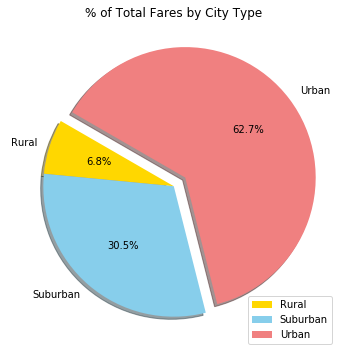

<Figure size 432x288 with 0 Axes>

In [101]:

Fares = merge_data["fare"].sum()

# creating a groupby statement

city_table = merge_data.groupby("type")


# Calculate Type Percents

All_Fares = city_table["fare"].sum()
All_Fares

In_percentage = (All_Fares/Fares) * 100 
In_percentage

# Build Pie Chart


colors = ["Gold", "SkyBlue", "LightCoral"]
explode = (0, 0, 0.11)
labels = In_percentage.index.tolist()
plt.figure(figsize=(8,6))
plt.pie(In_percentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

plt.legend(loc= "lower right").sizes = [60]
plt.show()

# Save Figure

plt.savefig("City_Fares.png", bbox_inches = 'tight')

## Total Rides by City Type

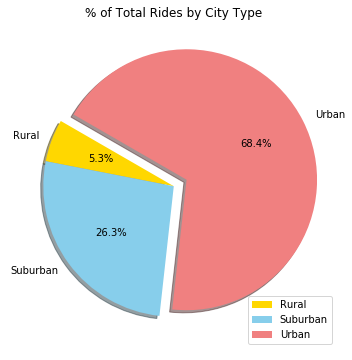

<Figure size 432x288 with 0 Axes>

In [99]:


# Calculate Ride Percents

Rides = merge_data["ride_id"].count()
city_table = merge_data.groupby("type")

Rides_by_City = city_table["ride_id"].count()


rides_percentage = (Rides_by_City/Rides) * 100
rides_percentage


# Build Pie Chart


colors = ["Gold", "SkyBlue", "LightCoral"]
explode = (0, 0, 0.11)
labels = rides_percentage.index.tolist()
plt.figure(figsize=(8,6))
plt.pie(rides_percentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

plt.legend(loc= "lower right").sizes = [60]
plt.show()

# Save Figure

plt.savefig("Rides.png", bbox_inches = 'tight')




## Total Drivers by City Type

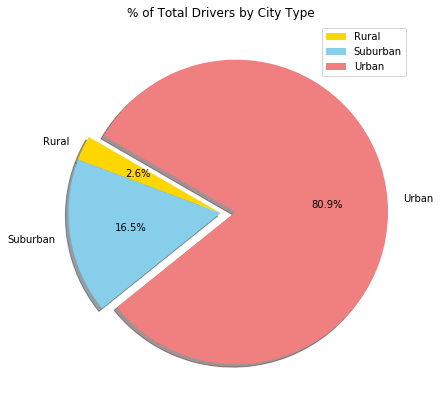

<Figure size 432x288 with 0 Axes>

In [100]:
# Calculate Driver Percents

# Calculate Type Percents
Drivers = city_data_df.groupby(['type'])
Drivers_total = Drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
plt.figure(figsize=(8,7))
explode = (0, 0, 0.1)
colors = ["Gold", "Skyblue", "Lightcoral"]
plt.pie(Drivers_total, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.legend(loc= "upper right").sizes = [50]



# Show Figure
plt.show()

# Save Figure

plt.savefig("DriversByCity.png", bbox_inches = 'tight')



